In [52]:
import pandas as pd

In [53]:
movies=pd.read_csv("ratings.csv")

In [54]:
movies.shape

(100836, 4)

In [55]:
df1=pd.read_csv("ratings.csv")

In [56]:
df1.shape

(100836, 4)

In [57]:
moviesdf = pd.read_csv("movies.csv")
print(moviesdf.shape)

(9742, 3)


In [60]:
unique= movies['userId'].nunique()
print(unique)

610


In [58]:
movies_data = pd.read_csv('movies.csv')
ratings_data = pd.read_csv('ratings.csv')
merged_data = pd.merge(ratings_data, movies_data, on='movieId')

In [59]:
print(merged_data.head(5))

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


In [48]:
movie_ratings_count = merged_data.groupby('title')['rating'].count()
max_rated_movie_title = movie_ratings_count.idxmax()
print(f"The movie with the maximum number of user ratings is: {max_rated_movie_title}")

The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [65]:
tags = pd.read_csv('tags.csv')
matrix_movie_id = 2571
matrix_tags = tags[tags['movieId'] == matrix_movie_id]
unique_tags = matrix_tags['tag'].unique()
print(f"The tags submitted for 'Matrix, The (1999)' are: {', '.join(unique_tags)}")

The tags submitted for 'Matrix, The (1999)' are: martial arts, sci-fi, alternate universe, philosophy, post apocalyptic


In [67]:
terminator_2_movie_id = moviesdf[moviesdf['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

terminator_2_ratings = movies[movies['movieId'] == terminator_2_movie_id]

average_rating = terminator_2_ratings['rating'].mean()

print(average_rating)

3.970982142857143


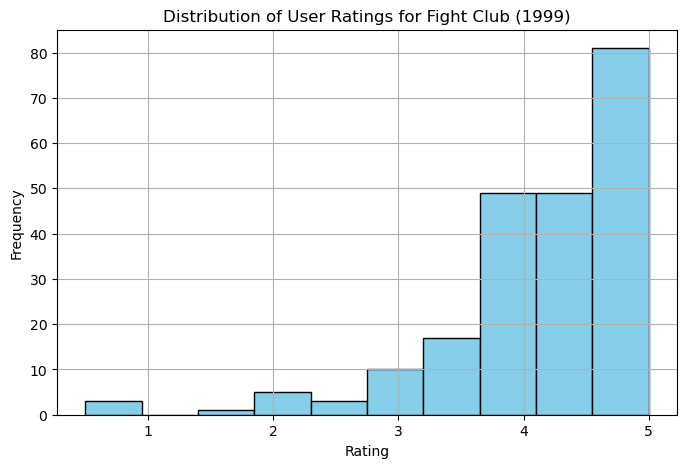

In [68]:
import matplotlib.pyplot as plt
fight_club_movie_id = moviesdf[moviesdf['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fight_club_ratings = movies[movies['movieId'] == fight_club_movie_id]

plt.figure(figsize=(8, 5))
plt.hist(fight_club_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [69]:
grouped_ratings = movies.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [70]:
merged_df = pd.merge(moviesdf, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['rating_count'] > 50]

print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [71]:
most_popular_movie = filtered_df[filtered_df['rating_mean'] == filtered_df['rating_mean'].max()]

print(most_popular_movie[['title', 'rating_mean']])

                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [72]:
top_5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

print(top_5_popular_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [73]:
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print(third_most_popular_scifi_movie[['title', 'rating_count']])


title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [75]:
matrix_movie_id = 2571
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag']

print("Unique tags for 'Matrix, The (1999)':")
print(matrix_tags.unique())

Unique tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']
